In [222]:
import os
import re

import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt
import wordcloud as wc

import nltk

# Resume

In [4]:
input_path = "data/cdiscount_train.csv.zip"
nb_line=100000  # part totale extraite du fichier initial ici déjà réduit
data_all = pd.read_csv(input_path, sep=",", nrows=nb_line)
data_all = data_all.fillna("") # pour les valeurs nulles
data_all.head()

,Categorie1,Categorie2,Categorie3,Description,Libelle,Marque
0,INFORMATIQUE,CONNECTIQUE - ALIMENTATION,BATTERIE,Batterie Acer Aspire One 751H-52Yr - Li-Ion 11...,Batterie Acer Aspire One 751H-52Yr,AUCUNE
1,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE - BUMPER - FACADE TELEPHONE,Coque rigide Bleu lagon pour ALCATEL OT / 6033...,Coque rigide Bleu lagon pour ALCATEL OT / 6033 …,MUZZANO
2,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE - BUMPER - FACADE TELEPHONE,Facades et coques CELLULAR LINE SHCKGALS 3 MIN...,Facades et coques CELLULAR LINE SHCKGALS 3 MINIP,CELLULAR LINE
3,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE - BUMPER - FACADE TELEPHONE,Coque meteore TPU LG Nexus 4 / E960,Coque meteore TPU LG Nexus 4 / E960,AUCUNE
4,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE - BUMPER - FACADE TELEPHONE,Coque souple Transparente pour LG G FLEX D959 ...,Coque souple Transparente pour LG G FLEX D959 m…,MUZZANO


In [5]:
data = data_all[["Categorie1","Description"]]
data

,Categorie1,Description
0,INFORMATIQUE,Batterie Acer Aspire One 751H-52Yr - Li-Ion 11...
1,TELEPHONIE - GPS,Coque rigide Bleu lagon pour ALCATEL OT / 6033...
2,TELEPHONIE - GPS,Facades et coques CELLULAR LINE SHCKGALS 3 MIN...
3,TELEPHONIE - GPS,Coque meteore TPU LG Nexus 4 / E960
4,TELEPHONIE - GPS,Coque souple Transparente pour LG G FLEX D959 ...
...,...,...
99995,DECO - LINGE - LUMINAIRE,Souvenirs de France - Tour Eiffel Miniature 'P...
99996,LIBRAIRIE,Fast Track to Waste-Free Manufacturing - John ...
99997,TELEPHONIE - GPS,fitBAG Bonga Girafe housse pochette pour télép...
99998,DECO - LINGE - LUMINAIRE,grand tableau minnie T 50x50 cm


In [6]:
#Mardi 4 fevrier

print(data['Categorie1'].describe())
print(data['Categorie1'].value_counts()) #comptage des valeurs

count               100000
unique                  44
top       TELEPHONIE - GPS
freq                 21325
Name: Categorie1, dtype: object
TELEPHONIE - GPS                              21325
INFORMATIQUE                                  14597
LIBRAIRIE                                     12121
VETEMENTS - LINGERIE                           6023
BIJOUX -  LUNETTES - MONTRES                   6014
DECO - LINGE - LUMINAIRE                       5866
AUTO - MOTO (NEW)                              4714
BRICOLAGE - OUTILLAGE - QUINCAILLERIE          3141
SPORT (NEW)                                    2565
ELECTROMENAGER                                 2152
JOUET (NEW)                                    2038
BAGAGERIE                                      1912
CULTURE / JEUX                                 1819
PHOTO - OPTIQUE                                1574
CHAUSSURES - ACCESSOIRES                       1391
MEUBLE                                         1383
HYGIENE - BEAUTE - PARFUM   

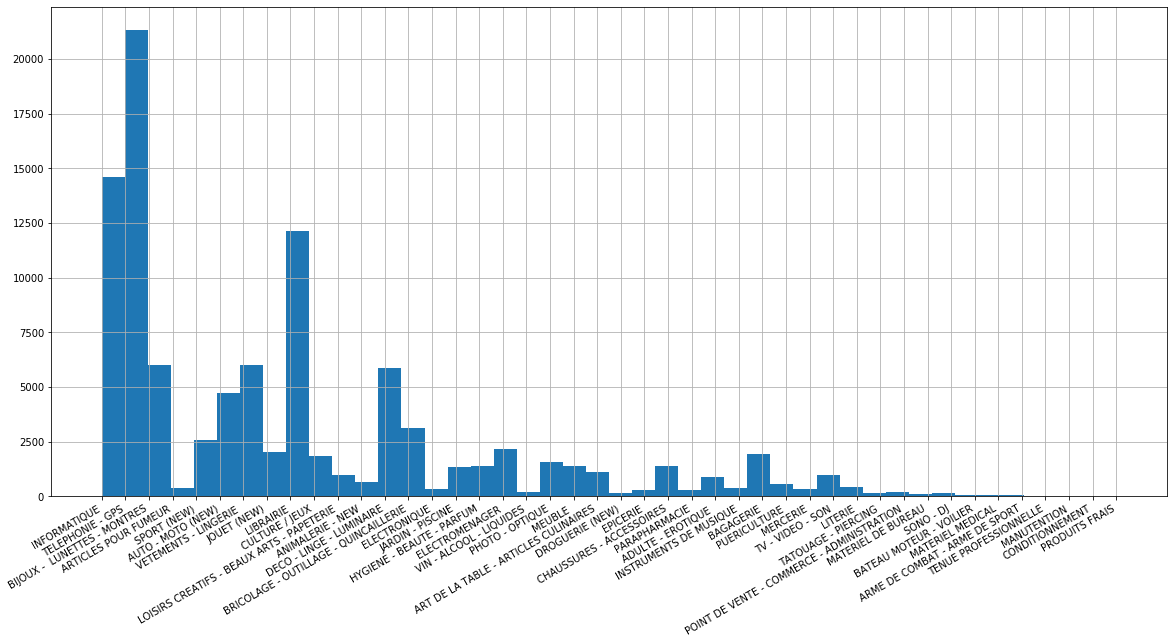

In [7]:
counts=data['Categorie1'].value_counts().tolist() #nb occurence
category=data['Categorie1'].value_counts().keys().tolist() #nom des categories


fig=plt.figure(figsize=(20,10))
data['Categorie1'].hist(bins=44)
fig.autofmt_xdate()

In [163]:
nbv=[]
mean=0
n=10
for k in range(n):
    nbv+=[data['Description'][k].count(' ')+1]
    mean+=data['Description'][k].count(' ')+1
    

###  Question : print(data.['Description'].describe() / par catégorie ??

In [9]:
data[data["Categorie1"]=="TELEPHONIE - GPS"].describe()

,Categorie1,Description
count,21325,21325
unique,1,20455
top,TELEPHONIE - GPS,Câble USB 2.0 charge et synchronisation pour t...
freq,21325,39


In [164]:
#print(data['Description'][0])
#nb0=data['Description'][0].count(' ')
#print(nb0+1)


for k in range(n):
    print(nbv[k])

print("Taille moyenne du voc :", int(mean)/n , " mots")

16
35
25
9
33
17
21
39
26
20
Taille moyenne du voc : 24.1  mots


### Attraper le voca d'une fiche produit

In [177]:
des = data['Description'][0]
desc = des.split(' ')
print("Nombre d'occurences dans la fiche produit 0 :", len(desc) ,"mots")    

Nombre d'occurences dans la fiche produit 0 : 16 mots


### Attraper tout le voca

In [137]:
voca = "" 
for k in range(nb_line):
    des = data['Description'][k]
    voca += des

### Le vocabulaire total: ensemble du vocabulaire, 2414812 occurrences uniques

In [138]:
#print(voca)
voca_nb = len(voca.split(' '))
print("Nb de mots : ", voca_nb)

Nb de mots :  2414812


### Nettoyage

In [140]:
voca_n = voca
voca_n = voca_n.lower()
voca_n = voca_n.replace(u'\u2026','.')
voca_n = voca_n.replace(u'\u00a0',' ')
#print(voca_n)


In [141]:
voca_n= unicodedata.normalize('NFD', voca_n).encode('ascii', 'ignore').decode("utf-8")
#print(voca_n)

In [145]:
voca_n = re.sub('[^a-z_]', ' ', voca_n)
#print(voca_n)
print(len(voca_n))

15055972


In [147]:
## listes de mots à supprimer dans la description des produits
## Depuis NLTK
nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words('french') 

stopwords[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/paulbrunet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle']

In [149]:
stopwords = [unicodedata.normalize('NFD', sw).encode('ascii', 'ignore').decode("utf-8") for sw in stopwords]
stopwords[:10]

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle']

In [269]:
tokens_total = [w for w in voca_n.split() if (len(w)>2) and (w not in stopwords)]
removed_words_total = [w for w in voca_n.split() if (len(w)<2) or (w in stopwords)]

In [270]:
tokens_total[:10]
print(len(tokens_total))

1443122


In [271]:
 ## Fonction de stemming permettant la racinisation
stemmer=nltk.stem.SnowballStemmer('french')
tokens_stem_total = [stemmer.stem(token) for token in tokens_total]
#print(tokens_stem)

In [272]:
len(set(tokens_stem_total))

81912

## Vocabulaire par catégorie

In [195]:
#recup des données sur la catégorie Tel - GPS
data1=data[data["Categorie1"]=="TELEPHONIE - GPS"]
print(data1)
print(data[data["Categorie1"]=="TELEPHONIE - GPS"]['Description'][5])

             Categorie1                                        Description
1      TELEPHONIE - GPS  Coque rigide Bleu lagon pour ALCATEL OT / 6033...
2      TELEPHONIE - GPS  Facades et coques CELLULAR LINE SHCKGALS 3 MIN...
3      TELEPHONIE - GPS               Coque meteore TPU  LG Nexus 4 / E960
4      TELEPHONIE - GPS  Coque souple Transparente pour LG G FLEX D959 ...
5      TELEPHONIE - GPS  Compatibilité iPhone 4, iPhone 4/4S, Caractéri...
...                 ...                                                ...
99974  TELEPHONIE - GPS  Coque souple Bleu lagon pour WIKO DARKMOON mot...
99980  TELEPHONIE - GPS  Stylet pour écran tactile. Longueur du stylet ...
99983  TELEPHONIE - GPS  Coque Galaxy S3 Design Winter is coming - Coqu...
99997  TELEPHONIE - GPS  fitBAG Bonga Girafe housse pochette pour télép...
99999  TELEPHONIE - GPS  Étui en cuir avec emplacements pour carte & su...

[21325 rows x 2 columns]
Compatibilité iPhone 4, iPhone 4/4S, Caractéristiques Etuis du corps entie

In [206]:
voca1 = "" 
for k in range(nb_line):
    if data["Categorie1"][k]=="TELEPHONIE - GPS" :
        des = data['Description'][k]
        voca1 += des

## for if Lourd ? Comment indicer un subset de data

### Nettoyage du vocabulaire sur cette catégorie

In [208]:
clean_voc1 = voca1
clean_voc1 = clean_voc1.lower()
clean_voc1 = clean_voc1.replace(u'\u2026','.')
clean_voc1 = clean_voc1.replace(u'\u00a0',' ')
print(len(clean_voc1))


3866140


In [209]:
clean_voc1= unicodedata.normalize('NFD', clean_voc1).encode('ascii', 'ignore').decode("utf-8")
#print(clean_voc1)

In [211]:
clean_voc1 = re.sub('[^a-z_]', ' ', clean_voc1)
#print(clean_voc1)
print(len(clean_voc1))

3864304


In [212]:
tokens1 = [w for w in clean_voc1.split() if (len(w)>2) and (w not in stopwords)]
removed_words1 = [w for w in clean_voc1.split() if (len(w)<2) or (w in stopwords)]

In [214]:
tokens1[:10]
print(len(tokens1))

407047


In [216]:
 ## Fonction de stemming permettant la racinisation
stemmer=nltk.stem.SnowballStemmer('french')
tokens_stem1 = [stemmer.stem(token) for token in tokens1]
#print(tokens_stem1)

In [229]:
toks1=set(tokens_stem1)
len(toks1)

9928

In [234]:
#print(toks1)
#print(str(toks1))

{'piraten', 'minitaill', 'dat', 'bean', 'smiling', 'scream', 'regener', 'randonne', 'kalix', 'croqu', 'impressionscoqu', 'objectifcoqu', 'matelasse', 'bri', 'sich', 'marbl', 'egant', 'maroc', 'tap', 'xoopar', 'favorit', 'khz', 'cig', 'coquepour', 'mac', 'chimiqulot', 'ericsson', 'metrevikuit', 'printemp', 'den', 'flacoqu', 'garten', 'complet', 'surpiq', 'boncuk', 'silhou', 'ungewohnlich', 'salamandr', 'eye', 'tig', 'exploited', 'kimmidoll', 'ordin', 'milli', 'blanccouvr', 'materiacoqu', 'austylet', 'stneopren', 'titan', 'eisen', 'presentationsamsonit', 'versat', 'gagn', 'knomo', 'transparentgard', 'cov', 'box', 'tel', 'synchroniscoqu', 'yin', 'vitess', 'iman', 'cardinal', 'himmelblau', 'coprocesseur', 'cabin', 'sonnenblumen', 'minichargeur', 'mtv', 'wi', 'cmfitbag', 'macro', 'long', 'agrav', 'penseur', 'doit', 'ennui', 'extr', 'mmpack', 'install', 'blockstreifen', 'prospect', 'pudding', 'sex', 'securit', 'cmhouss', 'commercialis', 'compteur', 'retract', 'chargeurcoqu', 'depourvu', 'sou

### WordCloud sur les tokens de Tel/GPS

In [267]:
wordcloud = wc.WordCloud().generate(str(tokens_stem1))

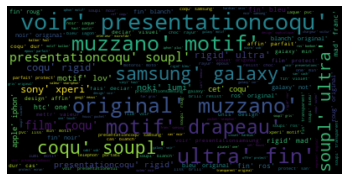

In [268]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Questions 13/02 
- bien nettoyé ?
- réindexer un subset 
- conversion set to string => ajout de ' 
- wordcloud pertinent ????

### Questions 04/02 
- trouver les doubles dans chaque produit
- pondération des occurences en fonction de leur fréquence par catégorie
- ordre alphabétique ?
- trouver le nb moyen d'occurences par catégorie 

# Consignes de nettoyage

In [251]:
i = 0
txt = data['Description'].values[i]
print("Original Description : " + data['Description'])

0        Original Description : Batterie Acer Aspire On...
1        Original Description : Coque rigide Bleu lagon...
2        Original Description : Facades et coques CELLU...
3        Original Description : Coque meteore TPU  LG N...
4        Original Description : Coque souple Transparen...
                               ...                        
99995    Original Description : Souvenirs de France - T...
99996    Original Description : Fast Track to Waste-Fre...
99997    Original Description : fitBAG Bonga Girafe hou...
99998    Original Description : grand tableau minnie T ...
99999    Original Description : Étui en cuir avec empla...
Name: Description, Length: 100000, dtype: object


In [253]:
txt = txt.lower()
print(txt)
len(set(txt.split(" ")))

batterie acer aspire one 751h-52yr - li-ion 11.1v 5200mah, 54wh noir, compatible batterie… voir la présentation


16

In [255]:
txt = txt.replace(u'\u2026','.')    
txt = txt.replace(u'\u00a0',' ')
print(txt)

batterie acer aspire one 751h-52yr - li-ion 11.1v 5200mah, 54wh noir, compatible batterie. voir la présentation


In [256]:
txt = unicodedata.normalize('NFD', txt).encode('ascii', 'ignore').decode("utf-8")
print(txt)

batterie acer aspire one 751h-52yr - li-ion 11.1v 5200mah, 54wh noir, compatible batterie. voir la presentation


In [257]:
txt = re.sub('[^a-z_]', ' ', txt)
print(txt)

batterie acer aspire one    h   yr   li ion     v     mah    wh noir  compatible batterie  voir la presentation


In [258]:
## listes de mots à supprimer dans la description des produits
## Depuis NLTK
nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words('french') 

stopwords[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/paulbrunet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle']

In [259]:
stopwords = [unicodedata.normalize('NFD', sw).encode('ascii', 'ignore').decode("utf-8") for sw in stopwords]
stopwords[:10]

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle']

In [260]:
tokens = [w for w in txt.split() if (len(w)>2) and (w not in stopwords)]
removed_words = [w for w in txt.split() if (len(w)<2) or (w in stopwords)]

print(tokens)
print(removed_words)

['batterie', 'acer', 'aspire', 'one', 'ion', 'mah', 'noir', 'compatible', 'batterie', 'voir', 'presentation']
['h', 'v', 'la']


In [261]:
## Fonction de stemming permettant la racinisation
stemmer=nltk.stem.SnowballStemmer('french')
tokens_stem = [stemmer.stem(token) for token in tokens]
print(tokens_stem)

['batter', 'acer', 'aspir', 'one', 'ion', 'mah', 'noir', 'compatibl', 'batter', 'voir', 'present']


In [262]:
set(tokens_stem)

{'acer',
 'aspir',
 'batter',
 'compatibl',
 'ion',
 'mah',
 'noir',
 'one',
 'present',
 'voir'}

In [263]:
wordcloud_init = wc.WordCloud().generate(str(tokens_stem))

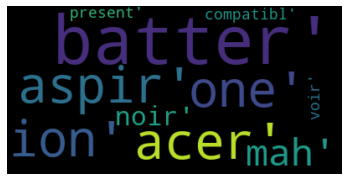

In [264]:
plt.imshow(wordcloud_init, interpolation='bilinear')
plt.axis("off")
plt.show()